# Google Play Store Data Analysis & Cleaning

## Table of Contents
<ul>
<li><a href="#intro">Introduction, Basic Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
    <ul>
        <li><a href="#one">Top 10 most popular apps by Num of Downloads</a></li>
        <li><a href="#two">Top 5 most popular Free & Paid categories for apps by Rating</a></li>
        <li><a href="#three">What % of Apps of each Content Rating</a></li>
        <li><a href="#four">Top 10 grossing Paid apps</a></li>
        <li><a href="#five">Top 10 Most popular Games by Num of Downloads</a></li>
    </ul>`
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>

## Introduction, Basic Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.style as style
from matplotlib.ticker import FuncFormatter

In [2]:
dfgplay = pd.read_csv('googleplaystore.csv')

In [3]:
dfgplay.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


##### Rename column labels to all lowercased & snakecased

In [4]:
dfgplay.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

##### Drop unnended, duplicated columns and rows with empty values

In [5]:
dfgplay.drop(['genres', 'android_ver', 'current_ver', 'last_updated', 'reviews'], axis=1, inplace=True)
dfgplay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 8 columns):
app               10841 non-null object
category          10841 non-null object
rating            9367 non-null float64
size              10841 non-null object
installs          10841 non-null object
type              10840 non-null object
price             10841 non-null object
content_rating    10840 non-null object
dtypes: float64(1), object(7)
memory usage: 677.6+ KB


In [6]:
dfgplay.dropna(inplace=True)

In [7]:
dfgplay.duplicated().value_counts()

False    8293
True     1073
dtype: int64

In [8]:
dfgplay.drop_duplicates(inplace=True)

##### Converting  "installs" to integers

In [9]:
dfgplay[["installs"]] = dfgplay[["installs"]].applymap(lambda x: x.replace("+", ""))
dfgplay[["installs"]] = dfgplay[["installs"]].applymap(lambda x: x.replace(",", ""))


In [10]:
dfgplay['installs'] = dfgplay['installs'].astype(int)

In [11]:
dfgplay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8293 entries, 0 to 10840
Data columns (total 8 columns):
app               8293 non-null object
category          8293 non-null object
rating            8293 non-null float64
size              8293 non-null object
installs          8293 non-null int64
type              8293 non-null object
price             8293 non-null object
content_rating    8293 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 583.1+ KB


##### Convert "price" to a float

In [12]:
dfgplay[["price"]] = dfgplay[["price"]].applymap(lambda x: x.replace("$", ""))

In [13]:
dfgplay['price'] = dfgplay['price'].astype(float)
dfgplay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8293 entries, 0 to 10840
Data columns (total 8 columns):
app               8293 non-null object
category          8293 non-null object
rating            8293 non-null float64
size              8293 non-null object
installs          8293 non-null int64
type              8293 non-null object
price             8293 non-null float64
content_rating    8293 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 583.1+ KB


<a id="eda"></a>

# Exploratory Data Analysis

<a id='one'></a>

### 1 - Top 10 most popular apps by Num of Downloads

In [14]:
mostpop = dfgplay[['app', 'installs']].groupby('app').sum().sort_values(by='installs',
                                                                                 ascending=False).head(10)

In [15]:
mostpop['appname'] = mostpop.index

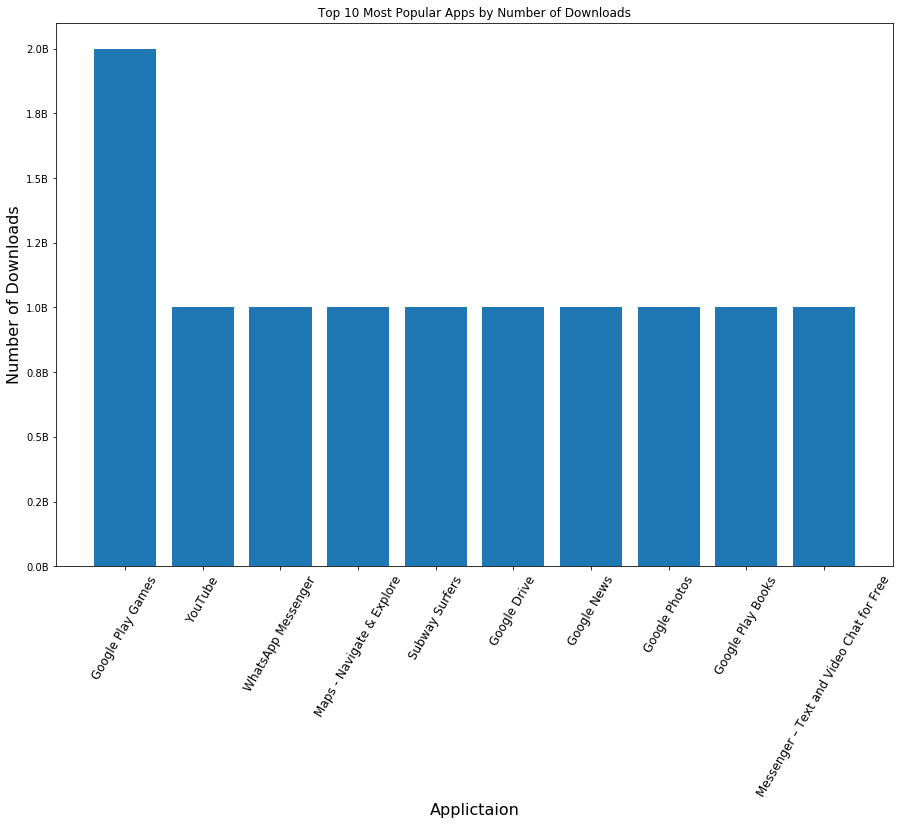

In [16]:
x = mostpop['appname']
y = mostpop['installs']

def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fB' % (x*1e-9)

formatter = FuncFormatter(millions)

fig, ax = plt.subplots(figsize=(15,10))
ax.yaxis.set_major_formatter(formatter)

plt.bar(x, y)

plt.title("Top 10 Most Popular Apps by Number of Downloads")
plt.ylabel("Number of Downloads", fontsize=16)
plt.xlabel("Applictaion", fontsize=16)
style.use('fivethirtyeight')
plt.xticks(fontsize=12, rotation=60 )
plt.show()

<a id='two'></a>
### 2 - Top 5 most popular Free & Paid categories for apps by Rating

In [17]:
dfgplay.type.value_counts()

Free    7687
Paid     606
Name: type, dtype: int64

##### making separate dataframes with FREE and PAID applications

In [18]:
dffree = dfgplay[dfgplay['type'].str.contains('Free')]
dfpaid = dfgplay[dfgplay['type'].str.contains('Paid')]

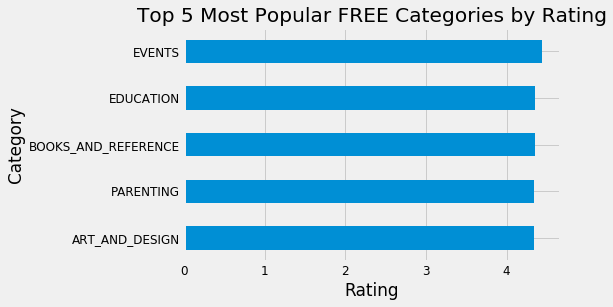

In [19]:
freecatbyrating = dffree[['category', 'rating']].groupby('category').mean()
freecatbyrating.sort_values(by='rating', inplace=True)
freecatbyrating[-5:].plot(kind="barh", title="Top 5 Most Popular FREE Categories by Rating", 
                          fontsize=12, legend=False)

plt.ylabel("Category")
plt.xlabel("Rating")
style.use('fivethirtyeight')

plt.show()

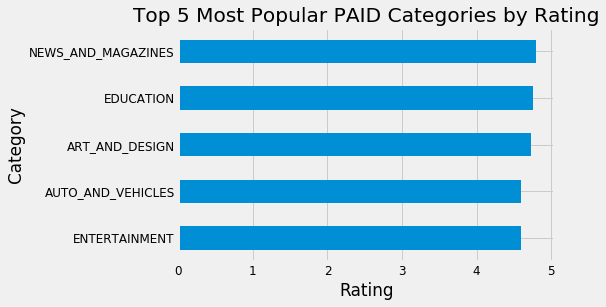

In [20]:
paidcatbyrating = dfpaid[['category', 'rating']].groupby('category').mean()
paidcatbyrating.sort_values(by='rating', inplace=True)
paidcatbyrating[-5:].plot(kind="barh", title="Top 5 Most Popular PAID Categories by Rating", 
                          fontsize=12, legend=False)

plt.ylabel("Category")
plt.xlabel("Rating")
style.use('fivethirtyeight')

plt.show()

<a id='three'></a>
### 3 - What % of Apps of each Content Rating

In [21]:
dfgplay['content_rating'].value_counts()

Everyone           6680
Teen                933
Mature 17+          357
Everyone 10+        319
Adults only 18+       3
Unrated               1
Name: content_rating, dtype: int64

##### Since "Adults only 18+"  and "Unrated" are less than 1% of all apps, i'll create dataframe without them for better visual purposes

In [22]:
contrating = dfgplay['content_rating'].value_counts().head(4)
contrating

Everyone        6680
Teen             933
Mature 17+       357
Everyone 10+     319
Name: content_rating, dtype: int64

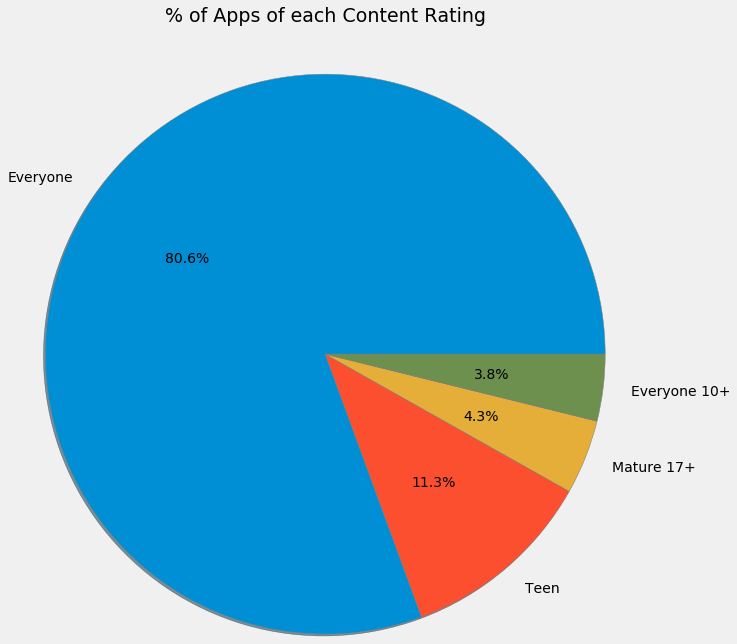

In [23]:
plt.style.use("fivethirtyeight")

labels = ['Everyone', 'Teen', 'Mature 17+', "Everyone 10+"]

plt.pie(contrating, wedgeprops={'edgecolor': 'gray'}, labels=labels, autopct='%1.1f%%',
      shadow=True, radius=3)
plt.title("% of Apps of each Content Rating", fontsize=19, y=1.9)


plt.show()

<a id='four'></a>
### 4 - Top 10 grossing Paid apps

##### Creating new column with approximate gross of each paid application

In [ ]:
dfpaid['approx_gross'] = dfpaid.price * dfpaid.installs

In [38]:
dfpaid.head(3)

,app,category,rating,size,installs,type,price,content_rating,approx_gross
2241,Minecraft,FAMILY,4.5,Varies with device,10000000,Paid,6.99,Everyone 10+,69900000.0
5351,I am rich,LIFESTYLE,3.8,1.8M,100000,Paid,399.99,Everyone,39999000.0
5356,I Am Rich Premium,FINANCE,4.1,4.7M,50000,Paid,399.99,Everyone,19999500.0


##### Sorting by "approx_gross"

In [ ]:
dftoppaid = dfpaid
dftoppaid.sort_values(by='approx_gross', inplace=True, ascending=False)

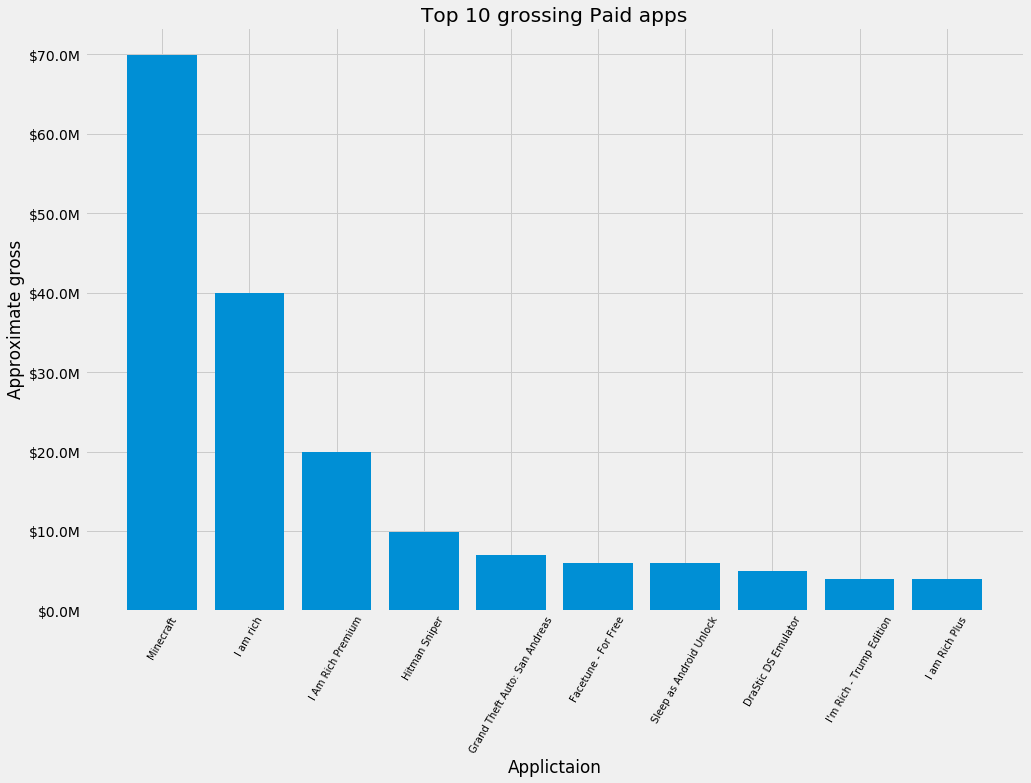

In [40]:
x = dftoppaid['app'].head(10)
y = dftoppaid['approx_gross'].head(10)

def millions(x, pos):
    'The two args are the value and tick position'
    return '$%1.1fM' % (x*1e-6)

formatter = FuncFormatter(millions)

fig, ax = plt.subplots(figsize=(15,10))
ax.yaxis.set_major_formatter(formatter)

plt.bar(x, y)

plt.title("Top 10 grossing Paid apps")
plt.ylabel("Approximate gross")
plt.xlabel("Applictaion")
plt.xticks(rotation=60, fontsize=10)
style.use('fivethirtyeight')

plt.show()

<a id='five'></a>
### 5 - Top 10 Most popular Games by Num of Downloads


##### Creating dataframes with Games only

In [41]:
dfgames = dfgplay[dfgplay['category'].str.contains('GAME')]
dfgames.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 916 entries, 1653 to 10804
Data columns (total 8 columns):
app               916 non-null object
category          916 non-null object
rating            916 non-null float64
size              916 non-null object
installs          916 non-null int64
type              916 non-null object
price             916 non-null float64
content_rating    916 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 64.4+ KB


In [42]:
mostpopgame = dfgames[['app', 'installs']].groupby('app').sum().sort_values(by='installs',
                                                                                 ascending=False).head(10)

In [43]:
mostpopgame['gamename'] = mostpopgame.index

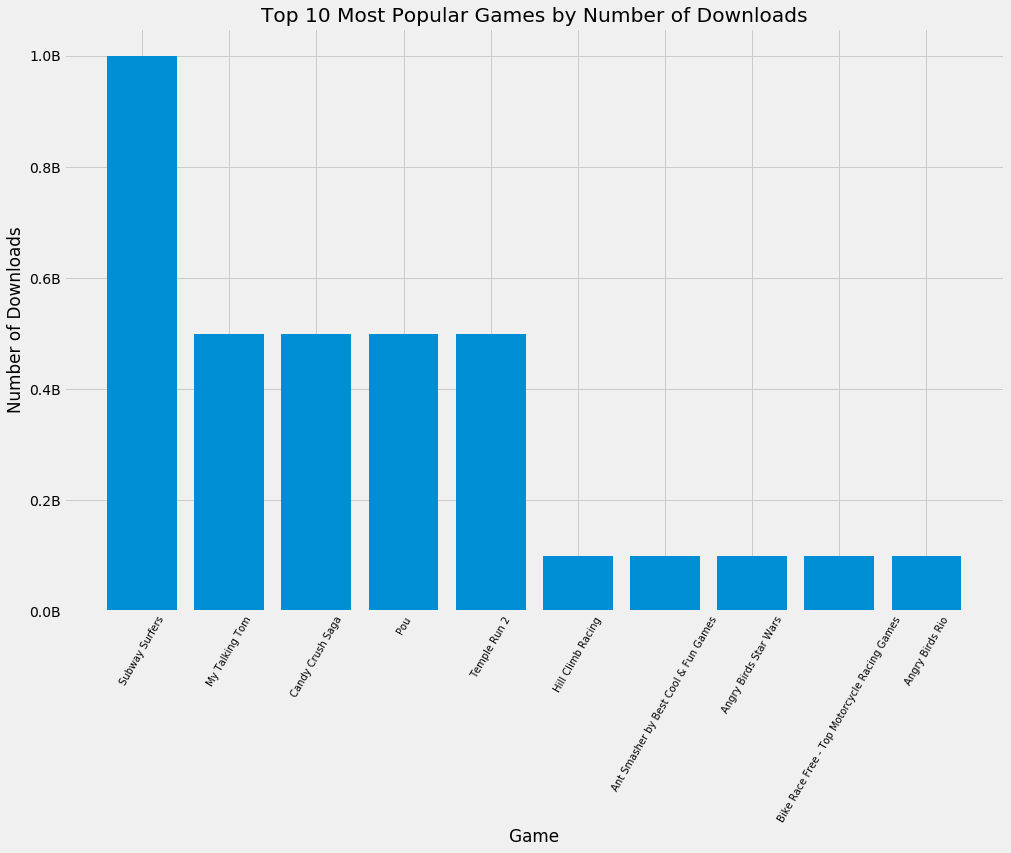

In [44]:
x = mostpopgame['gamename']
y = mostpopgame['installs']

def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fB' % (x*1e-9)

formatter = FuncFormatter(millions)

fig, ax = plt.subplots(figsize=(15,10))
ax.yaxis.set_major_formatter(formatter)

plt.bar(x, y)

plt.title("Top 10 Most Popular Games by Number of Downloads")
plt.ylabel("Number of Downloads")
plt.xlabel("Game")
style.use('fivethirtyeight')
plt.xticks(rotation=60, fontsize=10)


plt.show()

<a id='conclusions'></a>
## Conclusions

##### - Holy cow, about 1 BILLION installations of Subway Surfers !!!

In [45]:
dfgames[dfgames['app'].str.contains('Subway Surfers')]

,app,category,rating,size,installs,type,price,content_rating
1654,Subway Surfers,GAME,4.5,76M,1000000000,Free,0.0,Everyone 10+


#####  - OMG! Minecraft got around $70 millions 

In [46]:
dfpaid[dfpaid['app'].str.contains('Minecraft')]

,app,category,rating,size,installs,type,price,content_rating,approx_gross
2241,Minecraft,FAMILY,4.5,Varies with device,10000000,Paid,6.99,Everyone 10+,69900000.0
